In [1]:
# importing all necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading in the dataset

df = pd.read_csv(r'C:\Users\seunt\Downloads\SUPERVISE ML UDEMY\datasets\Buy_Book1.csv')

df.head()

,Age,Buy Book
0,43,1
1,34,0
2,39,1
3,27,0
4,44,1


In [3]:
# separating the dependent variable 'Price' from the independent variable

x = df.iloc[: , 0:-1].values
y = df.iloc[: , -1].values

In [4]:
x.shape

(29, 1)

In [5]:
# splitting into training and testing set

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)

In [6]:
# creating and instance for the random forest classifier, fitting it to the training set and then making prediction

rf = RandomForestClassifier(n_estimators = 10)

rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)

In [7]:
X_test

array([[39],
       [25],
       [54],
       [43],
       [34],
       [39],
       [40],
       [51],
       [42],
       [28],
       [49],
       [41]], dtype=int64)

In [8]:
Y_test

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [9]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [10]:
accuracy = accuracy_score(Y_test, y_pred)

accuracy

0.6666666666666666

In [11]:
cm = confusion_matrix(Y_test, y_pred)

cm

array([[5, 0],
       [4, 3]], dtype=int64)

In [12]:
# now let's see the performance of the random forest classifier when we have multiple independent variables

df2 = pd.read_csv(r'C:\Users\seunt\Downloads\SUPERVISE ML UDEMY\datasets\Buy_Book.csv')

df2.head()

,Age,Student,Income,Savings,Buy Book
0,43,No,median,Excellent,Yes
1,34,Yes,High,Fair,Yes
2,39,Yes,median,Fair,Yes
3,27,Yes,Low,Fair,Yes
4,44,No,High,Excellent,Yes


In [13]:
df2.columns

Index(['Age', 'Student', 'Income', 'Savings', 'Buy Book'], dtype='object')

In [14]:
# now we need to encode the categorical columns

for column in df2.columns:
    if df2[column].dtype == 'object':
        
        le = LabelEncoder()
    
        df2[column] = le.fit_transform(df2[column])

In [15]:
df2.head()

,Age,Student,Income,Savings,Buy Book
0,43,0,2,0,1
1,34,1,0,1,1
2,39,1,2,1,1
3,27,1,1,1,1
4,44,0,0,0,1


In [16]:
# separating the target variable from the independent variables

x1 = df2.drop('Buy Book', axis = 1)

y1 = df2['Buy Book']

In [17]:
x1.head()

,Age,Student,Income,Savings
0,43,0,2,0
1,34,1,0,1
2,39,1,2,1
3,27,1,1,1
4,44,0,0,0


In [18]:
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: Buy Book, dtype: int32

In [19]:
# splitting into training and testing set

X_train, X_test, Y_train, Y_test = train_test_split(x1, y1, test_size = 0.4, random_state = 0)

In [20]:
# creating and instance for the random forest regressor, fitting it to the training set and then making prediction

rf = RandomForestClassifier(n_estimators = 10)

rf.fit(X_train, Y_train)

y_pred1 = rf.predict(X_test)

In [21]:
X_test

,Age,Student,Income,Savings
5,42,0,2,1
2,39,1,2,1
19,38,1,0,0
16,46,1,1,0
11,34,0,2,0
22,32,1,0,2
17,42,0,2,0
24,31,1,2,2
23,49,0,1,1
14,28,0,0,0


In [22]:
Y_test

5     0
2     1
19    1
16    0
11    1
22    1
17    1
24    1
23    0
14    0
Name: Buy Book, dtype: int32

In [23]:
y_pred1

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [24]:
accuracy1 = accuracy_score(Y_test, y_pred1)

accuracy1

0.8

In [25]:
cm1 = confusion_matrix(Y_test, y_pred1)

cm1

array([[2, 2],
       [0, 6]], dtype=int64)

- The accuracy increased when we have multiple independent variables predicting if a person will buy a book or not using the random forest classifier. It implies that these variables correlate to the target variable thereby increasing the performance of the model.

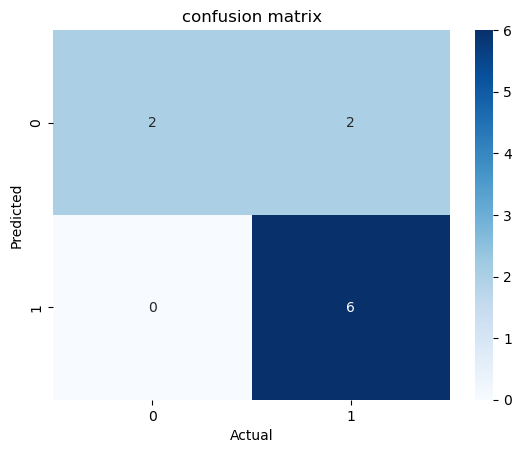

In [26]:
# visualizing the confusion matrix

sns.heatmap(cm1, annot = True, cbar = True, cmap = 'Blues')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('confusion matrix')

plt.show()